In [3]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
import numpy as np
import pandas as pd

### Reading in and sorting data

In [18]:
# Load data
all_stars = pd.read_csv('Data/calibrated_kepler_dr3_good.csv')
dr25 = pd.read_csv('Data/kepler_dr25.csv')
planets = dr25[dr25['koi_disposition'] == 'CONFIRMED']

# Define radius categories
categories = {
    'super_earths': (1.2, 2.0),
    'sub_neptunes': (2.0, 4.0),
    'radius_4to8': (4.0, 8.0),
    'radius_8to16': (8.0, 16.0)
}

# Function to filter planets by radius
def process_category(planets, min_radius, max_radius):
    category_planets = planets[planets['koi_prad'].between(min_radius, max_radius)]
    category_planets = category_planets.sort_values(by='koi_prad', ascending=False).drop_duplicates(subset='kepid')
    return category_planets

category_dataframes = {}
joined_dataframes = {}  # Dictionary to store joined dataframes

for category, (min_radius, max_radius) in categories.items():
    category_dataframes[category] = process_category(planets, min_radius, max_radius)
    joined_df = pd.merge(all_stars, category_dataframes[category], on='kepid', how='inner')
    joined_dataframes[category] = joined_df  # Store the joined dataframe
    print(f'Data for {category} contains {len(joined_df)} entries.')

super_earths = joined_dataframes['super_earths']
sub_neptunes = joined_dataframes['sub_neptunes']
radius_4to8 = joined_dataframes['radius_4to8']
radius_8to16 = joined_dataframes['radius_8to16']

Data for super_earths contains 683 entries.
Data for sub_neptunes contains 920 entries.
Data for radius_4to8 contains 158 entries.
Data for radius_8to16 contains 95 entries.


### Uncalibrated vs. calibrated basic histogram comparison

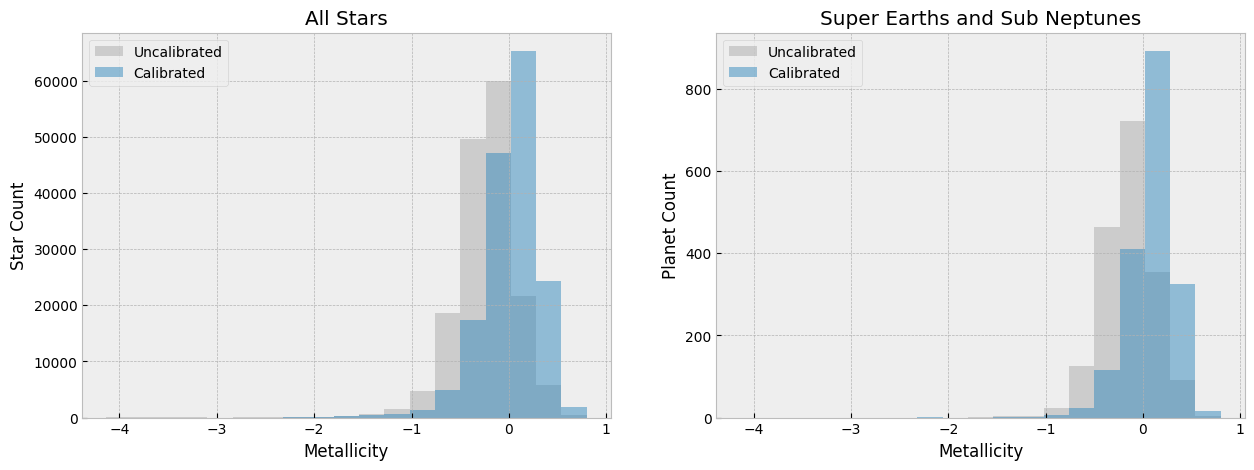

In [17]:
# Define bins for metallicity
bins = np.linspace(all_stars['mh_gspphot'].min(), all_stars['mh_gspphot'].max(), 20)
all_planets = all_stars[all_stars['nconfp'] > 0]

fig, axes = plt.subplots(nrows = 1,
                     ncols = 2,
                     figsize=(15,5))

axes[0].set_ylabel('Star Count')
axes[0].set_xlabel('Metallicity')
axes[0].set_title('All Stars')
n_stars_uncal, bins_stars_uncal, patches_stars_uncal = axes[0].hist(
    all_stars['mh_gspphot'], 
    bins, 
    alpha=0.3, 
    color = 'gray', 
    label = 'Uncalibrated'
);
n_stars_cal, bins_stars_cal, patches_stars_cal = axes[0].hist(
    all_stars['calibrated_FeH'], 
    bins, 
    alpha=0.5, 
    label = 'Calibrated'
);
axes[0].legend()

axes[1].set_ylabel('Planet Count')
axes[1].set_xlabel('Metallicity')
axes[1].set_title('Super Earths and Sub Neptunes')
n_planets_uncal, bins_planets_uncal, patches_planets_uncal = axes[1].hist(
    all_planets['mh_gspphot'], 
    bins, 
    alpha=0.3, 
    color = 'gray', 
    label = 'Uncalibrated'
);
n_planets_cal, bins_planets_cal, patches_planets_cal = axes[1].hist(
    all_planets['calibrated_FeH'], 
    bins, 
    alpha=0.5, 
    label = 'Calibrated'
);   
axes[1].legend();

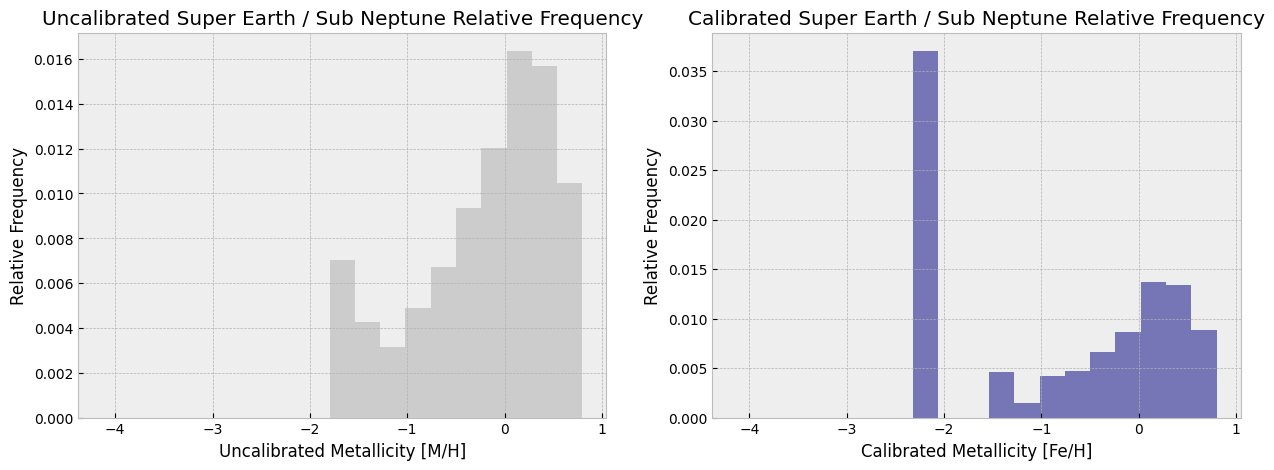

In [6]:
# plotting relative frequencies
uncalibrated_rel_freq = n_planets_uncal / n_stars_uncal
calibrated_rel_freq = n_planets_cal / n_stars_cal

fig, axes = plt.subplots(nrows = 1, 
                     ncols = 2, 
                     figsize = (15, 5))

axes[0].set_ylabel('Relative Frequency')
axes[0].set_xlabel('Uncalibrated Metallicity [M/H]')
axes[0].set_title('Uncalibrated Super Earth / Sub Neptune Relative Frequency')
axes[0].hist(
    bins[:-1], 
    bins, 
    weights = uncalibrated_rel_freq, 
    alpha=0.3, 
    color='gray', 
);

axes[1].set_ylabel('Relative Frequency')
axes[1].set_xlabel('Calibrated Metallicity [Fe/H]')
axes[1].set_title('Calibrated Super Earth / Sub Neptune Relative Frequency')
axes[1].hist(
    bins[:-1], 
    bins, 
    weights = calibrated_rel_freq, 
    alpha=0.5, 
    color='navy', 
);

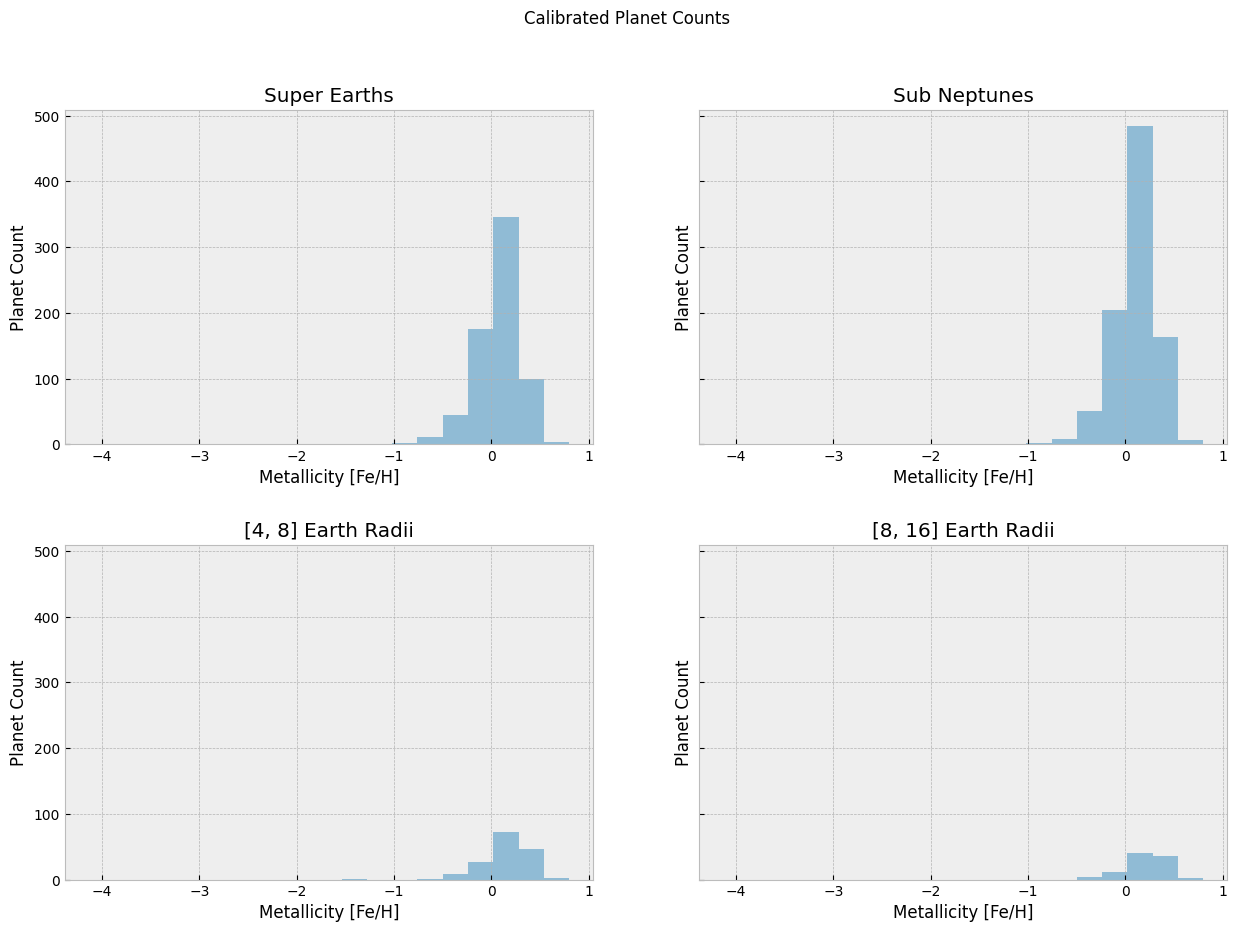

In [19]:
fig, axes = plt.subplots(nrows = 2,
                     ncols = 2, 
                     sharey = True, 
                     figsize=(15,10))
fig.subplots_adjust(hspace=0.3) # creates more space between rows, prevents title and x-axis overlap
fig.suptitle('Calibrated Planet Counts')

axes[0,0].set_ylabel('Planet Count')
axes[0,0].set_xlabel('Metallicity [Fe/H]')
axes[0,0].set_title('Super Earths')
n_super_earths, bins_super_earths, patches_super_earths = axes[0,0].hist(
    super_earths['calibrated_FeH'], 
    bins, 
    alpha=0.5
);

axes[0,1].set_ylabel('Planet Count')
axes[0,1].set_xlabel('Metallicity [Fe/H]')
axes[0,1].set_title('Sub Neptunes')
n_sub_neptunes, bins_sub_neptunes, patches_sub_neptunes = axes[0,1].hist(
    sub_neptunes['calibrated_FeH'], 
    bins, 
    alpha=0.5
);

axes[1,0].set_ylabel('Planet Count')
axes[1,0].set_xlabel('Metallicity [Fe/H]')
axes[1,0].set_title('[4, 8] Earth Radii')
n_4to8, bins_4to8, patches_4to8 = axes[1,0].hist(
    radius_4to8['calibrated_FeH'], 
    bins, 
    alpha=0.5
);

axes[1,1].set_ylabel('Planet Count')
axes[1,1].set_xlabel('Metallicity [Fe/H]')
axes[1,1].set_title('[8, 16] Earth Radii')
n_8to16, bins_8to16, patches_8to16 = axes[1,1].hist(
    radius_8to16['calibrated_FeH'], 
    bins, 
    alpha=0.5
);

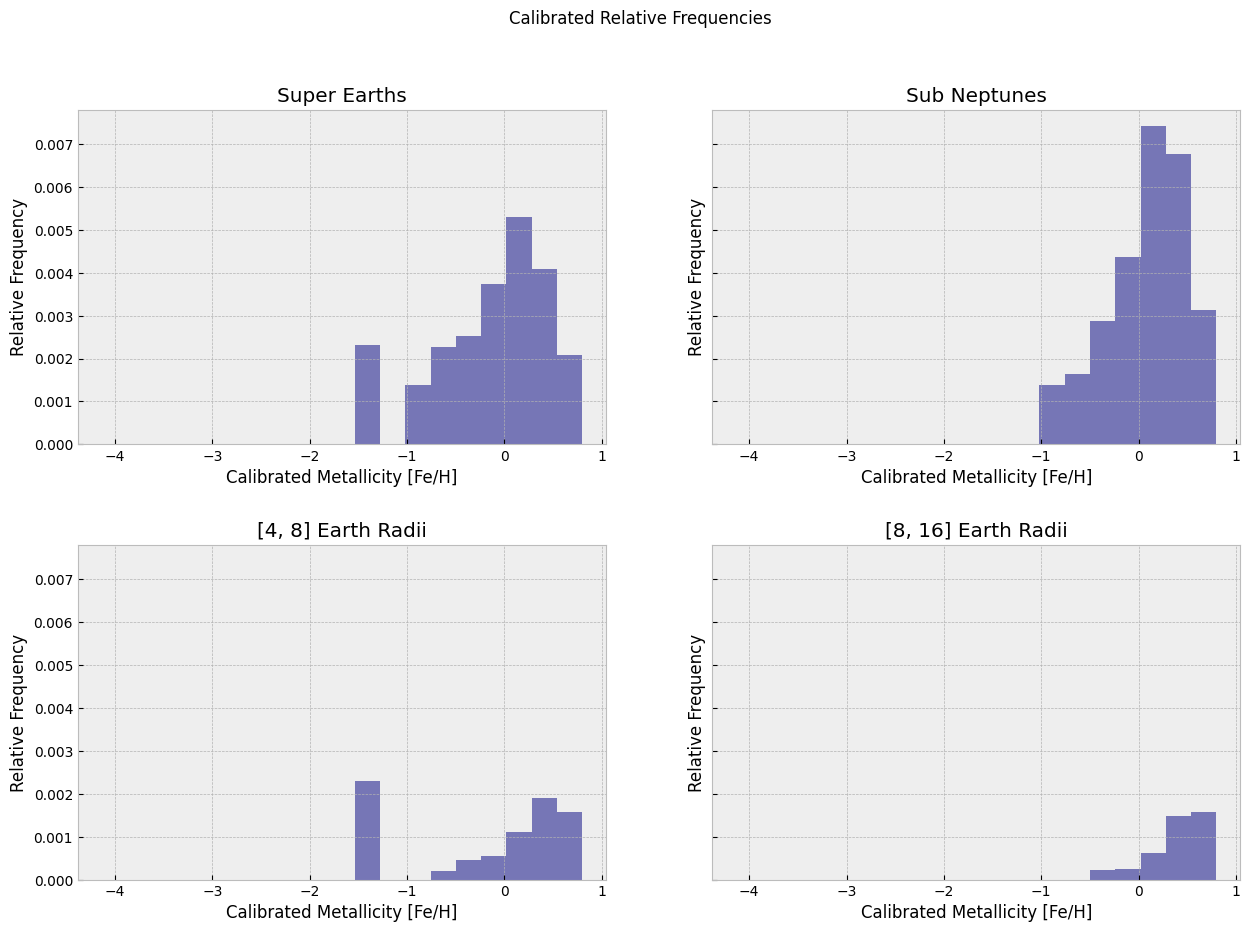

In [20]:
# plotting relative frequencies for other possible radius ranges
super_earth_rel_freq = n_super_earths / n_stars_cal
sub_neptune_rel_freq = n_sub_neptunes / n_stars_cal
radius_4to8_rel_freq = n_4to8 / n_stars_cal
radius_8to16_rel_freq = n_8to16 / n_stars_cal

fig, axes = plt.subplots(nrows = 2,
                     ncols = 2, 
                     sharey = True, 
                     figsize=(15,10))
fig.subplots_adjust(hspace=0.3) # creates more space between rows, prevents title and x-axis overlap
fig.suptitle('Calibrated Relative Frequencies')

axes[0,0].set_ylabel('Relative Frequency')
axes[0,0].set_xlabel('Calibrated Metallicity [Fe/H]')
axes[0,0].set_title('Super Earths')
axes[0,0].hist(
    bins[:-1], 
    bins, 
    weights = super_earth_rel_freq, 
    color = 'navy', 
    alpha=0.5
);

axes[0,1].set_ylabel('Relative Frequency')
axes[0,1].set_xlabel('Calibrated Metallicity [Fe/H]')
axes[0,1].set_title('Sub Neptunes')
axes[0,1].hist(
    bins[:-1], 
    bins, 
    weights = sub_neptune_rel_freq, 
    color = 'navy', 
    alpha=0.5
);

axes[1,0].set_ylabel('Relative Frequency')
axes[1,0].set_xlabel('Calibrated Metallicity [Fe/H]')
axes[1,0].set_title('[4, 8] Earth Radii')
axes[1,0].hist(
    bins[:-1], 
    bins, 
    weights = radius_4to8_rel_freq, 
    color = 'navy', 
    alpha=0.5
);

axes[1,1].set_ylabel('Relative Frequency')
axes[1,1].set_xlabel('Calibrated Metallicity [Fe/H]')
axes[1,1].set_title('[8, 16] Earth Radii')
axes[1,1].hist(
    bins[:-1], 
    bins, 
    weights = radius_8to16_rel_freq, 
    color = 'navy', 
    alpha=0.5
);